In [1]:
# install PySpark 
#http://spark.apache.org/docs/latest/api/python/index.html

!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 15.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=2a8b35f80ef0bd296ee95be330d8d97375657a11842137113fe394cc292bc9a7
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
# import python sql libraries and other functions 
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
# import python library for plotting data
import matplotlib.pyplot as plt

In [10]:
import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when
#from graphframes import *

In [3]:
# start spark sessnon and configureation
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext
#create an instance of SQLContext
sqlContext = SQLContext(spark)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/21 00:21:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
# start spark sessnon and configureation
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("rdd").getOrCreate()
sc = spark.sparkContext
# start spark sessnon and configuration
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dataframe").getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [5]:
# Import libraries and other functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [6]:
#create a dataFrame directly from csv file 
#https://data.police.uk/data/

NYPD= spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").\
csv("/kaggle/input/north-yorkshire-police-data/*street.csv")

In [7]:
NYPD.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [8]:
# tidy up the column names

NYPD = NYPD.withColumnRenamed('Crime ID', 'Crime_ID')
NYPD = NYPD.withColumnRenamed('Reported by', 'Reported_by')
NYPD = NYPD.withColumnRenamed('Falls within', 'Falls_within')
NYPD = NYPD.withColumnRenamed('LSOA code', 'LSOA_code')
NYPD = NYPD.withColumnRenamed('LSOA name', 'LSOA_name')
NYPD = NYPD.withColumnRenamed('Crime type', 'Crime_type')
NYPD = NYPD.withColumnRenamed('Last outcome category', 'Last_outcome_category')

In [9]:
NYPD.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



In [10]:
NYPD.take(2)

[Row(Crime_ID='353e431a73e8b83ef566b1d50e536624d4a5030c4b8c3db27cc1a33afc949ba3', Month='2022-07', Reported_by='North Yorkshire Police', Falls_within='North Yorkshire Police', Longitude=-1.87443, Latitude=53.94391, Location='On or near North Street', LSOA_code='E01010646', LSOA_name='Bradford 001A', Crime_type='Vehicle crime', Last_outcome_category='Status update unavailable', Context=None),
 Row(Crime_ID='6a400c1c574dd89b8738f9babe5a9f0becf9d12e1e7db13cd4e38ded9d54acb8', Month='2022-07', Reported_by='North Yorkshire Police', Falls_within='North Yorkshire Police', Longitude=-1.93008, Latitude=53.871891, Location='On or near Kenya Mount', LSOA_code='E01010721', LSOA_name='Bradford 009C', Crime_type='Drugs', Last_outcome_category='Offender given a drugs possession warning', Context=None)]

In [11]:
#get the counts for each month ordered in descending order
NYPD.groupby("Month").count().orderBy(desc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-07| 6547|
|2022-08| 6448|
|2022-05| 6228|
|2022-06| 5856|
|2023-03| 5636|
|2022-10| 5617|
|2022-03| 5533|
|2022-09| 5381|
|2023-01| 5259|
|2022-11| 5247|
|2022-04| 5181|
|2023-02| 5013|
|2022-12| 4802|
+-------+-----+



In [12]:
#retrieve yearly amount of crimes sorted descendantly
NYPD.select(substring(NYPD.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count")).show()

+----+-----+
|Year|count|
+----+-----+
|2022|56840|
|2023|15908|
+----+-----+



In [13]:
#retrieve monthly amount of crimes (excluded year 2021) sorted descendantly
NYPD.where((NYPD.Month !='2021-03')).\
select(substring(NYPD.Month, 6,7)\
                                                          \
       .alias('Month'), NYPD.Month.\
                                                          \
       alias('MonthWithYear')).groupby("Month").\
count().orderBy(desc("count")).show()

+-----+-----+
|Month|count|
+-----+-----+
|   03|11169|
|   07| 6547|
|   08| 6448|
|   05| 6228|
|   06| 5856|
|   10| 5617|
|   09| 5381|
|   01| 5259|
|   11| 5247|
|   04| 5181|
|   02| 5013|
|   12| 4802|
+-----+-----+



In [14]:
#register temp tables 
NYPD.registerTempTable("NYPD")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [17]:
sqlContext.sql("select * from tbl_NYPD").show()

AnalysisException: Table or view not found: tbl_NYPD; line 1 pos 14;
'Project [*]
+- 'UnresolvedRelation [tbl_NYPD], [], false


In [18]:
#retreive monthly crime amount and order by total in descending order
sqlContext.sql("select * from tbl_NYPD order by Month desc").show()

AnalysisException: Table or view not found: tbl_NYPD; line 1 pos 14;
'Sort ['Month DESC NULLS LAST], true
+- 'Project [*]
   +- 'UnresolvedRelation [tbl_NYPD], [], false


In [19]:
# Create new data frame with Month and Counts per Month
NYPD2 = NYPD.select(NYPD.Month)\
.groupby(NYPD.Month).count()

In [20]:
NYPD.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



In [21]:
NYPD.orderBy(desc("Month")).show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|  LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------+--------------------+---------------------+-------+
|a0fcee2c701d8e3c3...|2023-03|North Yorkshire P...|North Yorkshire P...| -2.35939|54.074064|On or near Black ...|E01027569|Craven 001C|Violence and sexu...|  Under investigation|   null|
|498b8fb920e1ef626...|2023-03|North Yorkshire P...|North Yorkshire P...|-2.519561|54.120169|On or near Moons ...|E01027559|Craven 001B|Violence and sexu...|  Under investigation|   null|
|1b083f26e446f6ed3...|2023-03|North Yorkshire P...|North Yorkshir

In [22]:
# Create new data frame with Month and Counts per Month
NYPD2 = NYPD.select(NYPD.Month)\
.groupby(NYPD.Month).count()


In [23]:
NYPD.registerTempTable("tbl_NYPD2")

In [24]:
NYPD2.registerTempTable("tbl_NYPD2")

In [25]:
# Create new dataframe with month, total, and averages
monthlyCrimeAmount = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_NYPD2 group by substring(Month, 6, 2)")

In [26]:
monthlyCrimeAmountnew = monthlyCrimeAmount.orderBy('Month')

In [27]:
monthlyCrimeAmountnew.show()

+-----+-----+-------+
|Month|Total|Average|
+-----+-----+-------+
|   01| 5259| 5259.0|
|   02| 5013| 5013.0|
|   03|11169| 5584.5|
|   04| 5181| 5181.0|
|   05| 6228| 6228.0|
|   06| 5856| 5856.0|
|   07| 6547| 6547.0|
|   08| 6448| 6448.0|
|   09| 5381| 5381.0|
|   10| 5617| 5617.0|
|   11| 5247| 5247.0|
|   12| 4802| 4802.0|
+-----+-----+-------+



In [45]:
# Register the monthlyCrimeAmount 
# DataFrame as a temp table and show the contents
monthlyCrimeAmountnew.registerTempTable("monthlyCrimeAmount")
sqlContext.sql("select * from monthlyCrimeAmount").show()

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


+-----+-----+-------+
|Month|Total|Average|
+-----+-----+-------+
|   01| 5259| 5259.0|
|   02| 5013| 5013.0|
|   03|11169| 5584.5|
|   04| 5181| 5181.0|
|   05| 6228| 6228.0|
|   06| 5856| 5856.0|
|   07| 6547| 6547.0|
|   08| 6448| 6448.0|
|   09| 5381| 5381.0|
|   10| 5617| 5617.0|
|   11| 5247| 5247.0|
|   12| 4802| 4802.0|
+-----+-----+-------+



In [46]:
# Prepare variables for visualisations

monthArray = sqlContext.sql("select Month from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

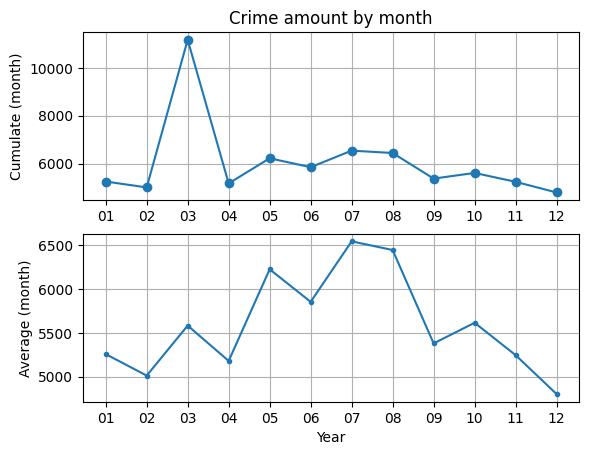

In [49]:
# Plot visualisations

import matplotlib.pyplot as plt
import numpy as np

y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by month')
plt.ylabel('Cumulate (month)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [30]:
# Create dataframe to retrieve information by year (total and average)
yearlyCrimeAmount = sqlContext.sql("select substring(Month, 0, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_NYPD2 group by substring(Month, 0, 4)")


In [31]:
yearlyCrimeAmount

DataFrame[Year: string, Total: bigint, Average: double]

In [32]:
yearlyCrimeAmount.show()

+----+-----+-----------------+
|Year|Total|          Average|
+----+-----+-----------------+
|2022|56840|           5684.0|
|2023|15908|5302.666666666667|
+----+-----+-----------------+



In [33]:
# Register the yearly data in a temp table and show the contents
yearlyCrimeAmount.registerTempTable("yearlyCrimeAmount")
sqlContext.sql("select * from yearlyCrimeAmount").show()

+----+-----+-----------------+
|Year|Total|          Average|
+----+-----+-----------------+
|2022|56840|           5684.0|
|2023|15908|5302.666666666667|
+----+-----+-----------------+



In [34]:
# Prepare variables for visualisations

totalArray = sqlContext.sql("select Total from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

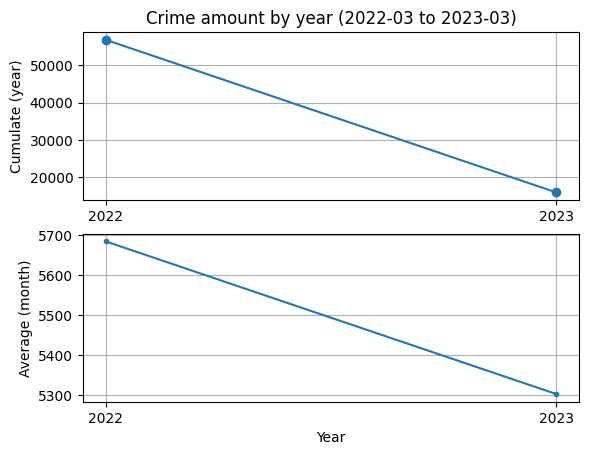

In [43]:
# Plot visualisations
import matplotlib.pyplot as plt
import numpy as np

y = yearArray
t = totalArray
a = averageArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by year (2022-03 to 2023-03)')
plt.ylabel('Cumulate (year)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

In [42]:
sqlContext.sql("select Month, substring(Month, 0, 4) \
as Year, count(*) as Count from tbl_NYPD group by Month").show()

AnalysisException: Table or view not found: tbl_NYPD; line 1 pos 69;
'Aggregate ['Month], ['Month, 'substring('Month, 0, 4) AS Year#445, count(1) AS Count#446L]
+- 'UnresolvedRelation [tbl_NYPD], [], false


In [37]:
NYPD.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



In [38]:
# Create a Temp Table

NYPD.registerTempTable("tbl_NYPDTypes")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [39]:
# Explore Crime Types per year/month

CrimeTypes = sqlContext.sql("select Crime_type, month, \
substring(month, 0, 4) as year,\
count(*) as Count from tbl_NYPDTypes group by month, Crime_type")

In [40]:
CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  month|year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 1500|
|       Vehicle crime|2023-03|2023|  140|
|         Shoplifting|2023-03|2023|  416|
|Possession of wea...|2022-05|2022|   25|
|Criminal damage a...|2022-07|2022|  532|
|               Drugs|2022-10|2022|  130|
|Possession of wea...|2022-10|2022|   34|
|        Public order|2023-03|2023|  419|
|Criminal damage a...|2022-08|2022|  528|
|            Burglary|2022-07|2022|  173|
|Theft from the pe...|2022-05|2022|   33|
|        Public order|2022-07|2022|  692|
|         Other crime|2022-08|2022|   89|
|       Vehicle crime|2022-06|2022|  145|
|         Other theft|2022-06|2022|  396|
|Criminal damage a...|2022-05|2022|  550|
|         Other theft|2022-08|2022|  371|
|             Robbery|2023-03|2023|   15|
|             Robbery|2022-08|2022|   21|
|         Other crime|2022-06|2022|   80|
+--------------------+-------+----

In [ ]:
# Explore Crime Types per year/month

CrimeTypesGeo = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year, Latitude, Longitude, \
count(*) as Count from tbl_LondonCrimeTypes group by Month, \
Crime_type, Latitude, Longitude")

In [50]:
filteredData = NYPD.filter(NYPD.Month.between("2022-01", "2023-12"))

# Group the data by crime type and month
crimeTypeMonthRelation = filteredData.groupby("Crime_type", "Month").count()

# Display the relation between crime type and month
crimeTypeMonthRelation.show()

+--------------------+-------+-----+
|          Crime_type|  Month|count|
+--------------------+-------+-----+
|         Other theft|2022-07|  391|
|         Other crime|2022-08|   89|
|         Other theft|2022-05|  390|
|        Public order|2023-03|  419|
|         Other crime|2022-03|   68|
|             Robbery|2022-05|   22|
|        Public order|2022-07|  692|
|Violence and sexu...|2023-03| 2114|
|Possession of wea...|2022-05|   25|
|         Other crime|2022-10|   83|
|         Other theft|2023-03|  350|
|       Vehicle crime|2023-03|  140|
|Possession of wea...|2022-07|   29|
|            Burglary|2022-05|  223|
|       Vehicle crime|2022-03|  125|
|         Shoplifting|2022-06|  299|
|Violence and sexu...|2022-05| 2039|
|         Shoplifting|2022-03|  247|
|         Other theft|2022-03|  341|
|               Drugs|2022-08|  121|
+--------------------+-------+-----+
only showing top 20 rows



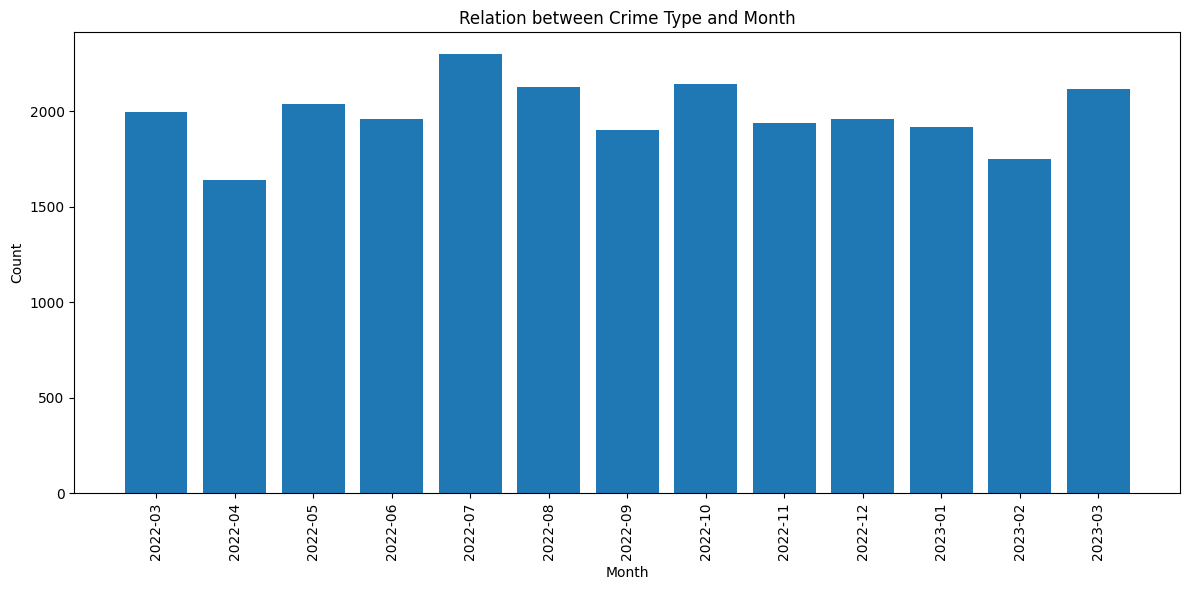

In [51]:
import matplotlib.pyplot as plt

# Convert the crimeTypeMonthRelation DataFrame to Pandas for plotting
relation_df = crimeTypeMonthRelation.toPandas()

# Sort the DataFrame by month for better visualization
relation_df = relation_df.sort_values(by="Month")

# Plotting the relation between crime type and month
plt.figure(figsize=(12, 6))
plt.bar(relation_df["Month"], relation_df["count"])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Relation between Crime Type and Month")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

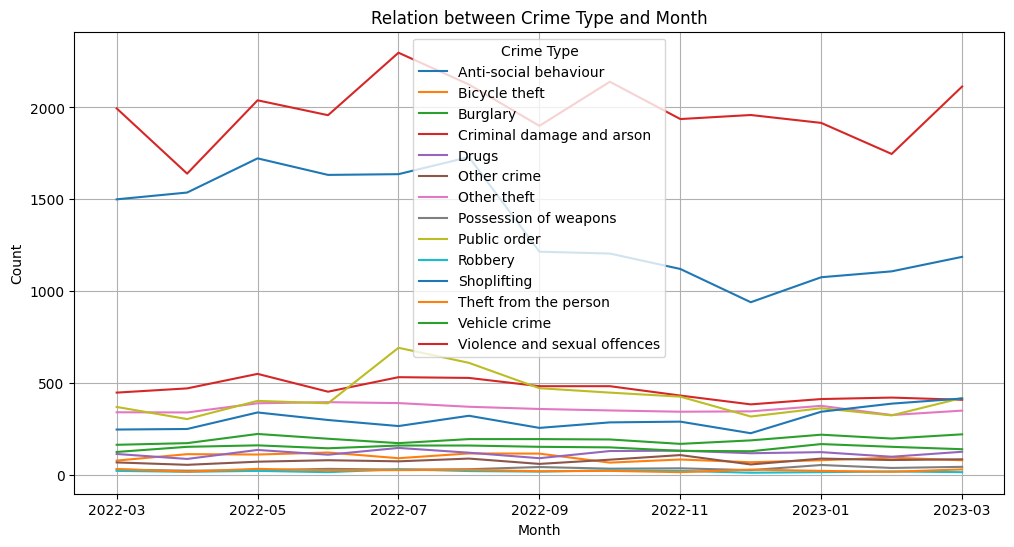

In [52]:
import matplotlib.pyplot as plt

# Filter the data for the desired time period (2022-2023)
filteredData = NYPD.filter(NYPD.Month.between("2022-01", "2023-12"))

# Group the data by crime type and month
crimeTypeMonthRelation = filteredData.groupby("Crime_type", "Month").count()

# Convert the DataFrame to Pandas for visualization
relationPandas = crimeTypeMonthRelation.toPandas()

# Pivot the data to have crime types as columns and months as indices
pivotTable = relationPandas.pivot(index='Month', columns='Crime_type', values='count')

# Plot the relation between crime type and month
pivotTable.plot(kind='line', figsize=(12, 6))
plt.title("Relation between Crime Type and Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()